In [1]:
!pip install tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import utils

CV2 -> Open CV
Sequential Model -> You have one layer which followed by another layer which is followed by a third layer and so on.
-> So, We are importing Sequence kind of models so the model that will be creating a sequential model the layers are one after the other .

-> In Layers we importing - Dense , Dropout , Activation, Faltten 

Dense Layer -> So, Dense layer are basically use to create fully connected layer .

Dropout Layer -> In dropout basically means thining out of the value this is used to prevent overfitting .

Activation - To add Activation Function.


Flatten -> You have to all the dimension and finally to get the classification part the convolution are used to get the feature and use those feature as input fully connected dense models that gives you the output .


** From Keras.layers import Conv2D , Maxpooling2D **


So , this 2 layers are Conv2d and Maxpooling 2D are basically layers that we will be using to adding to our already dense models.


" We have a Dense Layer then we have 2 More layer we will using we are adding Conv2D and Maxpooling 2D this 2 layers we will using " 



** From Keras.utils import Utils **


utils is basically use to plot the models

-> np.utils -> this is basically we will be using it to converting to categorical value to numberto categorical.






In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
y_train[0]

5

In [89]:
y_train.shape,y_test.shape,x_train.shape,x_test.shape

((60000, 10, 10, 10),
 (10000, 10, 10, 10),
 (60000, 28, 28, 1),
 (10000, 28, 28, 1))

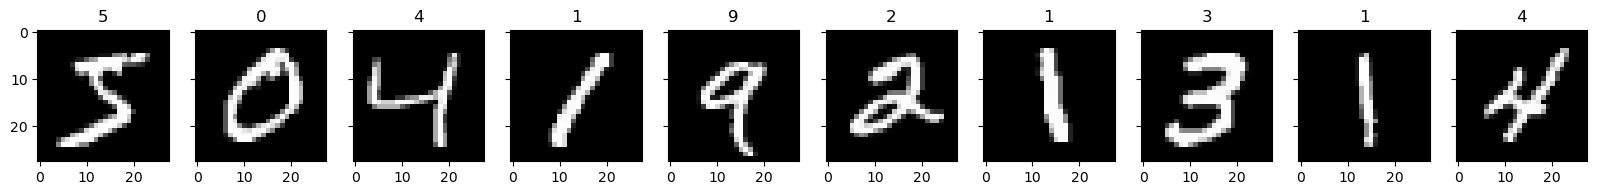

In [12]:
fig, axes = plt.subplots(ncols=10, sharex=False ,  sharey=True, figsize=(20,5))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()

In [13]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1) #1 is for how much channel we use 

In [15]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

1st Line Code -> We converting integer value to float value . why we are dong is . So it becomes easier when you are convoluting whole thing if your input and output are some datatype .


x_train /=55 -> if the color lie between [0-255] . 



0-> Black 


1-> White 


then we will dividing the whole thing with 255 and 0 will still remain zero . and it will represent black only . the  255 is converted to 1 abd this now will be weight so that means instead of [0-255] are value lies between [0-1] 

0-255/255 dividing the thing is to normalize it .



# y_train = np.eye(num_classes)[y_train]
# y_test = np.eye(num_classes)[y_test]


Categorical -> Y_train[0]

categorical value = 5 -> [0,0,0,0,0,1,0,0,0,0]

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [35]:
model= Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform' , input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(50,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

conv2d -> The first parameter in conv2d is .


-> The number of filters we will be using in this image 

-> We use 32 filters 

-> (3,3) Kernel Size , Since all the filter we are using this (3 X 3 ) Size 


Activation -> 'Relu'  activation means is after convolution.

-> First we have the multiplication of the value and those value are finally added up .

-> this is basically what linear  model can look like .


-> So to add non linearity always need to add an activation fucntion


-> We dont have worried about the relu causing the problem of gradient explosion  and vanishing gradient problem because we just have one convolution layer and our model is very small .




# Kernel Initializer -> So, Weight Initializer was basically when you have all weights in MLP . So  we had wx+b , b is bias .



= E wx+b

W -> The weight we will be using  when we firstly start the model build the model will randomly initialize the weights

Weights can be come from normal distribution

So , In this time this weights  are basically kernels this time . So , instead of one weight  we have kernel value  and this kernel value they will come from He_uniform.




## Conv2D -> So, You place the kernel in image then you shift in right direction to get the value . at the same time you also shifted in downward direction to get value . So since the kernel is shifted in two direction so , we have convolution 2D




## (max pooling 2D((2,2))->
-> maxpooling is also 3D Because of same reason the kernel is moving in 2 different direction .

## Activation-> Softmax -> Why SoftMax -> Softmax what it does is  it convert random values to probablities so if you want the probablities of this particular image belonging to class 0 to get the probablity we use softmax .


0.56,0.7,0.12,0.25,0.4,,0.3,0.2,0.1,0.6,0.4 -> we cannot change the output .. if we sum this we get 1 (Not this , this is a random number )This type of output we get.


In [36]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │         270,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,280 (1.03 MB)

 Trainable params: 271,280 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9112 - loss: 0.2903 - val_accuracy: 0.9794 - val_loss: 0.0643
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9826 - loss: 0.0567 - val_accuracy: 0.9809 - val_loss: 0.0546
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9894 - loss: 0.0349 - val_accuracy: 0.9841 - val_loss: 0.0465
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9926 - loss: 0.0239 - val_accuracy: 0.9817 - val_loss: 0.0556
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9957 - loss: 0.0152 - val_accuracy: 0.9819 - val_loss: 0.0591


In [38]:
model.save('mnist_cnn_model.h5')

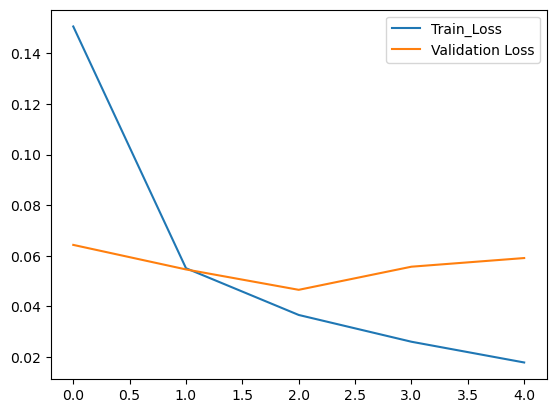

In [39]:
plt.plot(model.history.history['loss'],label='Train_Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()

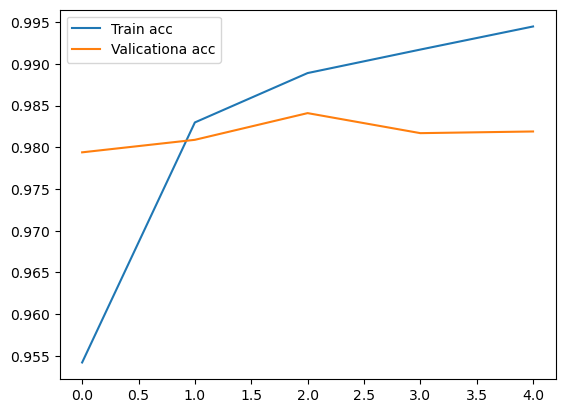

In [40]:
plt.plot(model.history.history['accuracy'],label='Train acc')
plt.plot(model.history.history['val_accuracy'],label='Valicationa acc')
plt.legend()

In [42]:
model= keras.models.load_model('mnist_cnn_model.h5')

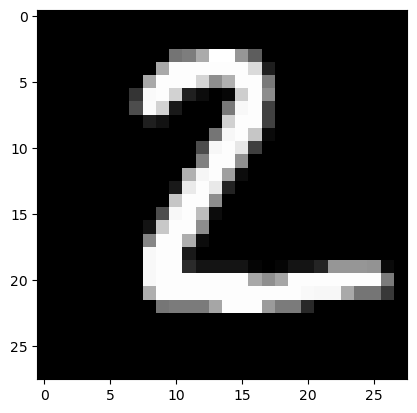

In [50]:
plt.imshow(x_test[1],cmap='gray')

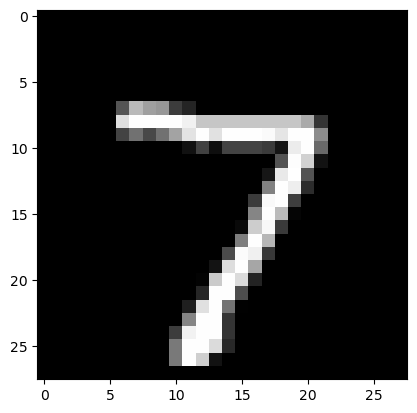

In [52]:
# Displaying the first test image from the dataset
plt.imshow(x_test[0], cmap='gray')

In [59]:
x=np.reshape(x_test[6],(1,28,28,1))
np.argmax(model.predict(x))
print(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[9.6914987e-10 2.0778944e-06 5.9958757e-07 1.2827058e-09 9.5879549e-01
  3.8118532e-07 6.6098564e-11 2.7289593e-07 4.0646944e-02 5.5420713e-04]]
